In [339]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
from pylab import rcParams
import seaborn as sns
%matplotlib inline
np.random.seed(27)
rcParams['figure.figsize'] = 10, 6
sns.set(style="darkgrid")
from sklearn.model_selection import train_test_split, KFold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pandas as pd
import nltk
import re
import unicodedata
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import RandomizedSearchCV

import string
nltk.download('stopwords')
nltk.download('punkt')
stopwords_ = set(stopwords.words('english'))
punctuation_ = set(string.punctuation)

from nltk.stem.snowball import SnowballStemmer
stemmer_snowball = SnowballStemmer('english')

from nltk.stem.porter import PorterStemmer
stemmer_porter = PorterStemmer()
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shwetasharma1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shwetasharma1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [340]:
df = pd.read_csv("./users_essay")

In [341]:
# rf_data = df[["age", "drinks", "education", "ethnicity", "orientation", "sex", "smokes", "religion", "drugs", "essay"]]
rf_data = df[["age", "essay", "drinks","smokes", "sex", "drugs"]]
# rf_data = df[["age", "essay","sex", "drinks","smokes","drugs", "ethnicity"]]

rf_data["drugs"] = rf_data["drugs"].replace(["never","sometimes", "often"], [0,1,1])

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## PreProcessing for NLP

In [342]:
def make_buckets(rf_data):
    
    # putting different ethnicities in wider buckets
    
    rf_data["ethnicity"] = rf_data["ethnicity"].fillna("other")
    rf_data.loc[rf_data['ethnicity'].str.contains('asian',), 'ethnicity'] = 'asian'
    rf_data.loc[rf_data['ethnicity'].str.contains('indian'), 'ethnicity'] = 'asian'
    rf_data.loc[rf_data["ethnicity"].str.contains('hispanic / latin'), 'ethnicity'] = 'hispanic/latin'
    rf_data.loc[rf_data["ethnicity"].str.contains('american'), 'ethnicity'] = 'american'
    rf_data.loc[rf_data["ethnicity"].str.contains('native american'), 'ethnicity'] = 'american'
    rf_data.loc[rf_data['ethnicity'].str.contains('black'), 'ethnicity'] = 'american'
    rf_data.loc[rf_data["ethnicity"].str.contains('pacific islander'), 'ethnicity'] = 'pacific islander'
    rf_data.loc[rf_data["ethnicity"].str.contains('white'), 'ethnicity'] = 'american'
    rf_data.loc[rf_data["ethnicity"].str.contains('middle eastern,'), 'ethnicity'] = 'middle eastern'
    
   # putting different religions in wider buckets

    rf_data["religion"] = rf_data["religion"].fillna("other")
    rf_data.loc[rf_data['religion'].str.contains('agnosticism'), 'religion'] = 'agnosticism'
    rf_data.loc[rf_data['religion'].str.contains('atheism'), 'religion'] = 'atheism'
    rf_data.loc[rf_data['religion'].str.contains('catholicism'), 'religion'] = 'catholicism'
    rf_data.loc[rf_data['religion'].str.contains('buddhism'), 'religion'] = 'buddhism'
    rf_data.loc[rf_data['religion'].str.contains('other'), 'religion'] = 'other'
    rf_data.loc[rf_data['religion'].str.contains('hinduism'), 'religion'] = 'hinduism'
    rf_data.loc[rf_data['religion'].str.contains('islam'), 'religion'] = 'islam'
    rf_data.loc[rf_data['religion'].str.contains('judaism'), 'religion'] = 'judaism'
    rf_data.loc[rf_data['religion'].str.contains('christianity'), 'religion'] = 'christianity'
    
    # putting different education classes in wider buckets


    rf_data["education"] = rf_data["education"].fillna('in college/university')
    rf_data.loc[rf_data['education'].str.contains("graduated"), 'education'] = 'graduated'
    rf_data.loc[rf_data['education'].str.contains("working"), 'education'] = 'in college/university'
    rf_data.loc[rf_data['education'].str.contains("two-year college"), 'education'] = 'in college/university'
    rf_data.loc[rf_data['education'].str.contains("masters program"), 'education'] = 'in college/university'
    rf_data.loc[rf_data['education'].str.contains("law school"), 'education'] = 'in college/university'
    rf_data.loc[rf_data['education'].str.contains("space camp"), 'education'] = 'in college/university'
    rf_data.loc[rf_data['education'].str.contains("ph.d program"), 'education'] = 'in college/university'
    rf_data.loc[rf_data['education'].str.contains("med school"), 'education'] = 'in college/university'
    rf_data.loc[rf_data['education'].str.contains("college/university"), 'education'] = 'in college/university'
    rf_data.loc[rf_data['education'].str.contains("dropped out"), 'education'] = 'dropped out'
    
    #treating nans
    rf_data["drinks"] = rf_data["drinks"].fillna("not at all")
    rf_data["smokes"] = rf_data["smokes"].fillna("no")

In [249]:
make_buckets(rf_data)

/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/shwetasharma1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [343]:
# cleaned_rf_data = rf_data[["age", "drinks", "education", "ethnicity", "orientation", "sex", "smokes", "religion", "drugs"]]

cleaned_rf_data = rf_data[["age", "drinks", "sex", "smokes", "drugs"]]

# cleaned_rf_data = rf_data[["age", "sex", "drinks","smokes","drugs", "ethnicity"]]
cleaned_rf_data_dummified = pd.get_dummies(cleaned_rf_data)

In [344]:
cleaned_rf_data_dummified = pd.concat([cleaned_rf_data_dummified, rf_data["essay"]], axis = 1)

In [345]:
X_nlp = cleaned_rf_data_dummified.loc[:,cleaned_rf_data_dummified.columns != "drugs"]


y_nlp = cleaned_rf_data_dummified.loc[:,cleaned_rf_data_dummified.columns == "drugs"]

In [346]:
X_nlp_train, X_nlp_test, y_nlp_train, y_nlp_test = train_test_split(X_nlp, y_nlp, test_size = .20, stratify = y_nlp, random_state=1)

## TFIDF vectorization

In [347]:
tfidf = TfidfVectorizer(max_features = 1000)

In [348]:
tfidf_matrix_train = tfidf.fit_transform(X_nlp_train.essay.values.astype('U'))

In [349]:
tfidf_matrix_test =  tfidf.transform(X_nlp_test.essay.values.astype('U'))

In [350]:
data_train = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf.get_feature_names())
data_test = pd.DataFrame(tfidf_matrix_test.toarray(), columns=tfidf.get_feature_names())

In [351]:
data_train.reset_index(drop=True, inplace=True)
X_nlp_train.reset_index(drop=True, inplace=True)
df_nlp_train = pd.concat([data_train, X_nlp_train], axis=1)

data_test.reset_index(drop=True, inplace=True)
X_nlp_test.reset_index(drop=True, inplace=True)
df_nlp_test = pd.concat([data_test, X_nlp_test], axis=1)

In [352]:
df_nlp_test = df_nlp_test.drop("essay", axis=1)
df_nlp_train = df_nlp_train.drop("essay", axis=1);

In [353]:
df_nlp_train.reset_index(drop=True, inplace=True)
y_nlp_train.reset_index(drop=True, inplace=True)
new_train = pd.concat([df_nlp_train, y_nlp_train], axis = 1)


df_nlp_test.reset_index(drop=True, inplace=True)
y_nlp_test.reset_index(drop=True, inplace=True)
new_test = pd.concat([df_nlp_test, y_nlp_test], axis = 1)

In [354]:
untouched_x = new_test.loc[:, new_test.columns != "drugs"]
untouched_y = new_test.loc[:, new_test.columns == "drugs"]

## OVERSAMPLING

In [355]:
# Class count
count_class_0, count_class_1 = new_train["drugs"].value_counts()

rf_class_0 = new_train[new_train['drugs'] == 0]
rf_class_1 = new_train[new_train['drugs'] == 1]

Random over-sampling:
1    30179
0    30179
Name: drugs, dtype: int64


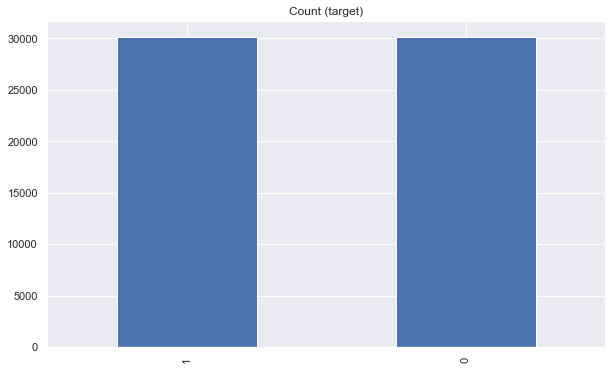

In [356]:
rf_class_1_over = rf_class_1.sample(count_class_0, replace=True)
rf_test_over = pd.concat([rf_class_0, rf_class_1_over], axis=0)

print('Random over-sampling:')
print(rf_test_over["drugs"].value_counts())

rf_test_over["drugs"].value_counts().plot(kind='bar', title='Count (target)');

In [357]:
X_nlp_over = rf_test_over.loc[:, rf_test_over.columns != "drugs"]
y_nlp_over = rf_test_over.loc[:, rf_test_over.columns =="drugs"]
X_nlp_over_train, X_nlp_over_test, y_nlp_over_train, y_nlp_over_test = train_test_split(X_nlp_over, y_nlp_over, test_size=0.20, random_state=1)

In [358]:
def run_model(estimator, X, y):
    kf = KFold(n_splits=5, shuffle=True)
    
    acc = []
    f1 = []
    for train_idx, test_idx in kf.split(X):
        X_train = X[train_idx]
        y_train = y[train_idx]
         
        
        X_test = X[test_idx]
        y_test = y[test_idx]

        # data prep
        
        estimator.fit(X_train, y_train)
        y_preds = estimator.predict(X_test)
        acc.append(accuracy_score(y_test, y_preds))
        f1.append(f1_score(y_test, y_preds))
    
    generate_model_report(y_test, y_preds)
        
    plt.plot(range(0, 5), f1, label=estimator.__class__.__name__)
    
def generate_model_report(y_actual, y_predicted):
    print('Accuracy: %.3f' % accuracy_score(y_actual, y_predicted))
    print('Precision: %.3f' % precision_score(y_actual, y_predicted))
    print( 'Recall: %.3f' % recall_score(y_actual, y_predicted))
    print('F1 score: %.3f' % f1_score(y_actual, y_predicted))

## SMOTE

In [38]:
sm = SMOTE(random_state=12, sampling_strategy=1.0)
X_train_res, y_train_res = sm.fit_sample(df_nlp_train.values, y_nlp_train["drugs"].values)

In [39]:
gb = GradientBoostingClassifier()
gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier()

In [40]:
Y_smot_preds = gb.predict(untouched_x)

In [41]:
generate_model_report(untouched_y, Y_smot_preds )

Accuracy: 0.820
Precision: 0.476
Recall: 0.502
F1 score: 0.489


## Logistic Regression (Round 2)

In [293]:
lr = LogisticRegression(max_iter=1200).fit(X_nlp_over_train.values, y_nlp_over_train["drugs"].values)
y_nlp_over_preds = lr.predict(X_nlp_over_test)

In [294]:
generate_model_report(y_nlp_over_test, y_nlp_over_preds)

Accuracy: 0.800
Precision: 0.799
Recall: 0.799
F1 score: 0.799


In [295]:
y_nlp_final_preds = lr.predict(untouched_x)
generate_model_report(untouched_y, y_nlp_final_preds)

Accuracy: 0.785
Precision: 0.438
Recall: 0.744
F1 score: 0.551


## Random Forest Classifier (Round 2)

In [238]:
model = RandomForestClassifier(n_estimators = 400, max_features = 160, max_depth = 1, min_samples_leaf = 2)
model.fit(X_nlp_over_train.values, y_nlp_over_train["drugs"].values)


RandomForestClassifier(max_depth=1, max_features=160, min_samples_leaf=2,
                       n_estimators=400)

In [239]:
y_nlp_over_preds = model.predict(X_nlp_over_test)

In [240]:
generate_model_report(y_nlp_over_test, y_nlp_over_preds)

Accuracy: 0.698
Precision: 0.775
Recall: 0.552
F1 score: 0.645


In [241]:
y_nlp_final_preds = model.predict(untouched_x)
generate_model_report(untouched_y, y_nlp_final_preds)

Accuracy: 0.790
Precision: 0.430
Recall: 0.559
F1 score: 0.486


## Gradient Boosting Classifier (Round 3)

In [359]:
gb = GradientBoostingClassifier(max_depth =   2, learning_rate= 0.1, min_samples_leaf=1, min_samples_split=2, n_estimators = 400, max_features = 170)

gb.fit(X_nlp_over_train.values, y_nlp_over_train["drugs"].values)

GradientBoostingClassifier(max_depth=2, max_features=170, n_estimators=400)

In [360]:
y_nlp_over_preds = gb.predict(X_nlp_over_test)

In [361]:
generate_model_report(y_nlp_over_test, y_nlp_over_preds)

Accuracy: 0.773
Precision: 0.777
Recall: 0.762
F1 score: 0.769


In [362]:
y_nlp_final_preds = gb.predict(untouched_x)
generate_model_report(untouched_y, y_nlp_final_preds)

Accuracy: 0.770
Precision: 0.415
Recall: 0.715
F1 score: 0.525


## Testing on untouched data 

In [307]:
users_test = pd.read_csv("./users_test")

In [305]:
users_test[users_test.columns != "drugs"]

ValueError: Item wrong length 31 instead of 14080.

In [309]:
users_test = users_test.drop("Unnamed: 0", axis = 1)

In [314]:
rf_test = users_test[["age", "essay","sex", "drinks","smokes","drugs", "ethnicity"]]

In [317]:
cleaned_rf_test = rf_test[["age", "drinks", "sex", "smokes", "drugs"]]

In [318]:
cleaned_rf_test_dummified = pd.get_dummies(cleaned_rf_test)

In [319]:
cleaned_rf_test_dummified = pd.concat([cleaned_rf_test_dummified, rf_test["essay"]], axis = 1)

In [327]:
X_rf = cleaned_rf_test_dummified.loc[:,cleaned_rf_test_dummified.columns != "drugs"]


y_rf = cleaned_rf_test_dummified.loc[:,cleaned_rf_test_dummified.columns == "drugs"]

In [366]:
tfidf = TfidfVectorizer(max_features = 1000)

In [367]:
tfidf_matrix_test = tfidf.fit_transform(X_rf.essay.values.astype('U'))

NotFittedError: The TF-IDF vectorizer is not fitted

In [333]:
data_actual = pd.DataFrame(tfidf_matrix_test.toarray(), columns=tfidf.get_feature_names())

In [334]:
data_actual.reset_index(drop=True, inplace=True)
X_rf.reset_index(drop=True, inplace=True)
df_rf_actual = pd.concat([data_actual, X_rf], axis=1)

In [335]:
df_rf_actual = df_rf_actual.drop("essay", axis=1)

In [373]:
y_preds_test = gb.predict_proba(df_rf_actual)[:,1]

In [376]:
y_preds_test = np.array(["yes" if val >=0.5 else "no" for val in y_preds_test])

In [380]:
y_preds_test_df = pd.DataFrame(y_preds_test)

In [384]:
final_table = pd.concat([users_test, y_preds_test_df], axis = 1)

In [389]:
final_table[["age", "sex", "essay","drinks", "smokes","drugs", 0]].sample(20)

,age,sex,essay,drinks,smokes,drugs,0
3595,25,m,go omin self summari find humor everyth even m...,socially,no,NaN,no
4196,25,f,opposit messi unorgan impuls mesh add soft spo...,socially,NaN,NaN,no
27,28,m,like everyon els site feel awkward tri sum box...,socially,no,NaN,yes
4022,30,m,move california texa want go back school berke...,socially,no,NaN,no
5148,31,m,origin salt lace citi utah oakland last four y...,socially,sometimes,NaN,yes
1848,24,f,week ago hang friend odd reason end describ th...,socially,no,NaN,no
7254,34,m,witti clever funni sarcast stubborn hyperbol e...,often,when drinking,NaN,yes
113,35,m,made meat long rememb cope condit find way enj...,often,no,NaN,yes
3855,38,f,like laugh usual smile least quick wit enjoy m...,often,sometimes,NaN,yes
2150,40,f,famili import valu life grew five sibl parent ...,socially,no,NaN,no
